In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
df = pd.read_excel('bankruptcy-prevention (2).xlsx')

In [3]:
df.head(5)

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class,Unnamed: 1
0,0.5;1;0;0;0;0.5;bankruptcy,NaN
1,0;1;0;0;0;1;bankruptcy,NaN
2,1;0;0;0;0;1;bankruptcy,NaN
3,0.5;0;0;0.5;0;1;bankruptcy,NaN
4,1;1;0;0;0;1;bankruptcy,NaN


In [4]:
df.tail(5)

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class,Unnamed: 1
245,0;1;1;1;1;1;non-bankruptcy,NaN
246,1;1;0.5;1;1;0;non-bankruptcy,NaN
247,0;1;1;0.5;0.5;0;non-bankruptcy,NaN
248,1;0;0.5;1;0.5;0;non-bankruptcy,NaN
249,1;0;0.5;0.5;1;1;non-bankruptcy,NaN


## Dropping the unnamed column

In [5]:
df = df.drop(columns=['Unnamed: 1'], errors='ignore')

# Replace semicolons with commas in the entire DataFrame
df = df.applymap(lambda x: str(x).replace(';', ','))

In [6]:
df

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,"0.5,1,0,0,0,0.5,bankruptcy"
1,"0,1,0,0,0,1,bankruptcy"
2,"1,0,0,0,0,1,bankruptcy"
3,"0.5,0,0,0.5,0,1,bankruptcy"
4,"1,1,0,0,0,1,bankruptcy"
...,...
245,"0,1,1,1,1,1,non-bankruptcy"
246,"1,1,0.5,1,1,0,non-bankruptcy"
247,"0,1,1,0.5,0.5,0,non-bankruptcy"
248,"1,0,0.5,1,0.5,0,non-bankruptcy"


## Iterating over each column, spliting the values, and join the results

In [7]:
df_split = pd.DataFrame()


for col in df.columns:
    split_col = df[col].str.split(',', expand=True)
    df_split = pd.concat([df_split, split_col], axis=1)

In [8]:
df_split

,0,1,2,3,4,5,6
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,non-bankruptcy
246,1,1,0.5,1,1,0,non-bankruptcy
247,0,1,1,0.5,0.5,0,non-bankruptcy
248,1,0,0.5,1,0.5,0,non-bankruptcy


In [9]:
#renaming the columns
df_split = df_split.rename(columns={
    0: 'industrial_risk',
    1: 'management_risk',
    2: 'financial_flexibility',
    3: 'credibility',
    4: 'competitiveness',
    5: 'operating_risk',
    6: 'class'
})

In [10]:
df_split

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,non-bankruptcy
246,1,1,0.5,1,1,0,non-bankruptcy
247,0,1,1,0.5,0.5,0,non-bankruptcy
248,1,0,0.5,1,0.5,0,non-bankruptcy


In [11]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   industrial_risk        250 non-null    object
 1   management_risk        250 non-null    object
 2   financial_flexibility  250 non-null    object
 3   credibility            250 non-null    object
 4   competitiveness        250 non-null    object
 5   operating_risk         250 non-null    object
 6   class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [12]:
df_split

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,non-bankruptcy
246,1,1,0.5,1,1,0,non-bankruptcy
247,0,1,1,0.5,0.5,0,non-bankruptcy
248,1,0,0.5,1,0.5,0,non-bankruptcy


In [13]:
data = df_split.copy()

In [14]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,non-bankruptcy
246,1,1,0.5,1,1,0,non-bankruptcy
247,0,1,1,0.5,0.5,0,non-bankruptcy
248,1,0,0.5,1,0.5,0,non-bankruptcy


In [15]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,1,1,0,0,0,1,non-bankruptcy
freq,89,119,119,94,103,114,143


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   industrial_risk        250 non-null    object
 1   management_risk        250 non-null    object
 2   financial_flexibility  250 non-null    object
 3   credibility            250 non-null    object
 4   competitiveness        250 non-null    object
 5   operating_risk         250 non-null    object
 6   class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [17]:
data.shape

(250, 7)

## Changing the datatype to float

In [18]:
data['industrial_risk'] = pd.to_numeric(data['industrial_risk'])
data['management_risk'] = pd.to_numeric(data['management_risk'])
data['financial_flexibility'] = pd.to_numeric(data['financial_flexibility'])
data['credibility'] = pd.to_numeric(data['credibility'])
data['competitiveness'] = pd.to_numeric(data['competitiveness'])
data['operating_risk'] = pd.to_numeric(data['operating_risk'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [20]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## checking is there any missing values are there in data or not

In [21]:
data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [22]:
data.shape

(250, 7)

In [23]:
data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [24]:
data.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


In [25]:
data_new = data.iloc[:,:]
data_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [26]:
data_new["class_yn"] = 1
data_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


### Here we are changing the target variable to bankruptcy = 0, non-bankruptcy = 1

In [27]:
data_new.loc[data['class'] == 'bankruptcy', 'class_yn'] = 0

In [28]:
data_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [29]:
data_new.drop('class', inplace = True, axis =1)
data_new.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


## Data Visualization

In [30]:
data_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_yn,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


#### In this correlation matrix we can see no columns are correlated to each other neither input variables

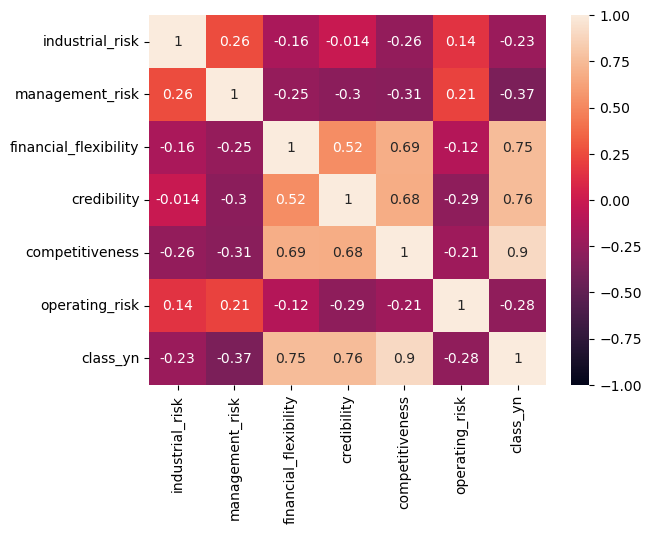

In [31]:
sns.heatmap(data_new.corr(), vmin = -1, vmax = 1, annot = True)
plt.show()

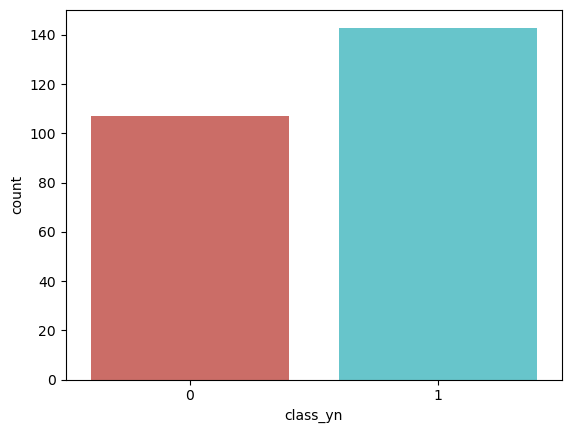

In [32]:
sns.countplot(x = 'class_yn', data = data_new, palette = 'hls')
plt.show()

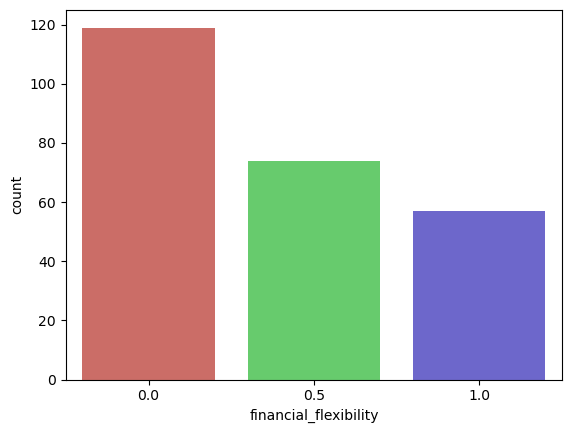

In [33]:
sns.countplot(x = 'financial_flexibility', data = data_new, palette = 'hls')
plt.show()

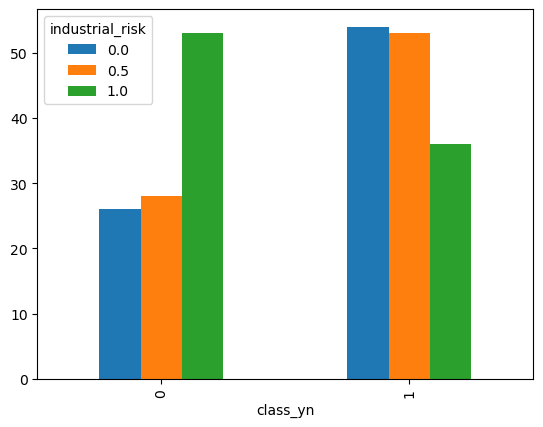

In [34]:
# for visualization 

pd.crosstab(data.class_yn,data.industrial_risk).plot(kind='bar')
plt.show()

In [35]:
data_new.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class_yn'],
      dtype='object')

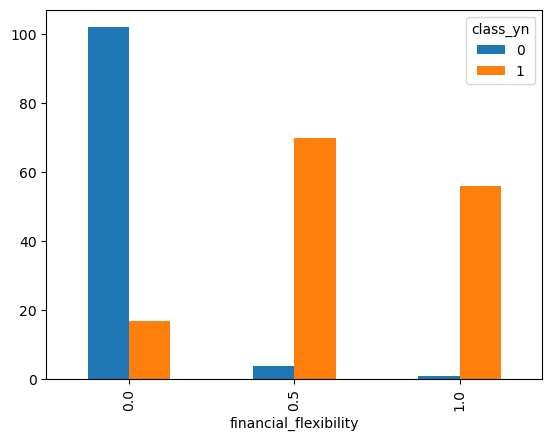

In [36]:
pd.crosstab(data_new['financial_flexibility'], data_new['class_yn']).plot(kind = 'bar')
plt.show()

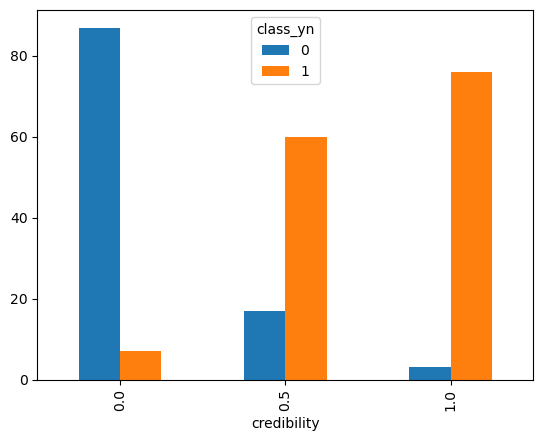

In [37]:
pd.crosstab(data_new['credibility'], data_new.class_yn).plot(kind = 'bar')
plt.show()

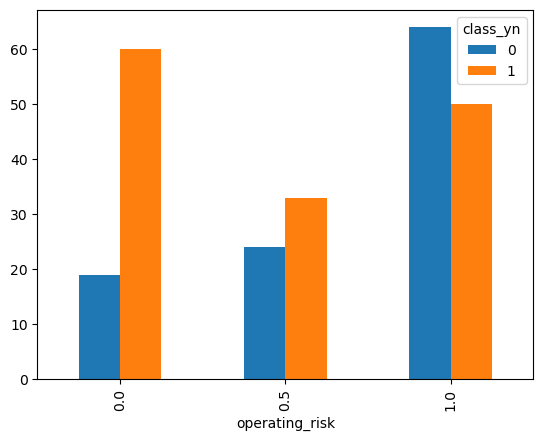

In [38]:
pd.crosstab(data_new['operating_risk'], data_new.class_yn).plot(kind='bar')
plt.show()

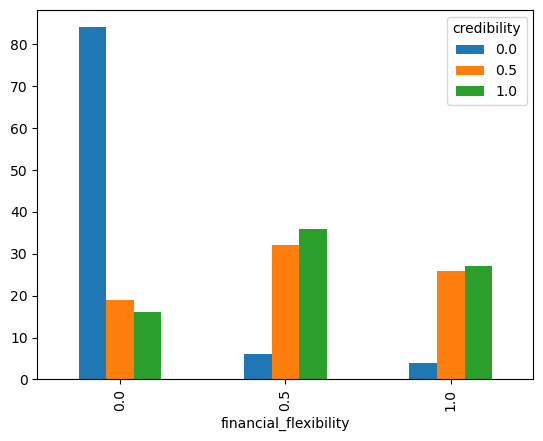

In [39]:
pd.crosstab(data_new['financial_flexibility'], data_new['credibility']).plot(kind = 'bar')
plt.show()

In [40]:
np.shape(data_new)

(250, 7)

Check the outliers

In [41]:
data_new.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class_yn'],
      dtype='object')

<Axes: >

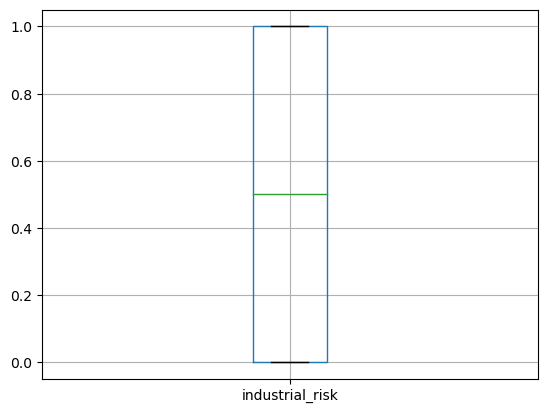

In [42]:
data_new[['industrial_risk']].boxplot()

<Axes: >

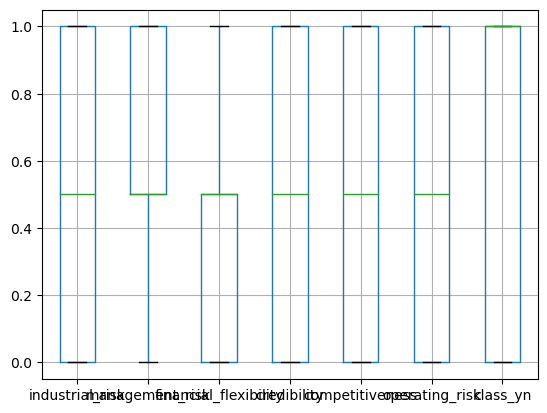

In [43]:
data_new.boxplot()

In [44]:
from sklearn.ensemble import IsolationForest
data1=data_new.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly']==-1]

In [45]:
outliers

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn,anamoly
27,0.0,0.0,0.0,0.0,0.0,1.0,0,-1
72,1.0,0.5,1.0,0.5,0.0,0.0,0,-1
192,0.5,1.0,0.0,0.0,1.0,0.0,1,-1


In [46]:
data_new.drop([27,72,192],axis=0,inplace=True)

In [47]:
data_new.shape

(247, 7)

# Splitting Data

In [50]:
x = data_new.iloc[:,:6]
y = data_new['class_yn']

In [51]:
x

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [52]:
y

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class_yn, Length: 247, dtype: int64

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [107]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((197, 6), (197,), (50, 6), (50,))

# SVM Model

In [57]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'C':[10,0.1,0.001,1]}]
grid = GridSearchCV(clf,param_grid,cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 1],
                          'kernel': ['linear', 'rbf']}])

In [58]:
grid.best_score_,grid.best_params_

(1.0, {'C': 10, 'kernel': 'linear'})

In [56]:
clf=SVC(kernel='linear', C=10, gamma = 'scale')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred)

Test Accuracy  = 100.0
Train Accuracy = 100.0


array([[27,  0],
       [ 0, 23]], dtype=int64)

In [57]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1], dtype=int64)

In [61]:
clf=SVC(kernel='rbf', C=10, gamma = 'auto')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred)

Test Accuracy  = 100.0
Train Accuracy = 100.0


array([[22,  0],
       [ 0, 28]], dtype=int64)

In [62]:
clf = SVC()
param_grids = [{'kernel':['poly'], 'degree':[0,1,2,3,4,5,6], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'degree': [0, 1, 2, 3, 4, 5, 6],
                          'kernel': ['poly']}])

In [63]:
grid.best_score_, grid.best_params_

(1.0, {'C': 15, 'degree': 1, 'kernel': 'poly'})

In [64]:
clf_p=SVC(kernel='poly', C=15, degree =1 )
clf_p.fit(x_train, y_train)
y_pred_p = clf_p.predict(x_test)
y_pred1 = clf_p.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred_p)

Test Accuracy  = 100.0
Train Accuracy = 100.0


array([[22,  0],
       [ 0, 28]], dtype=int64)

In [91]:
# CART Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10)

model = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

model = DecisionTreeClassifier()
dt=model.fit(x,y)

0.9916666666666666


# LogisticRegression

In [93]:
from sklearn.linear_model import LogisticRegression

In [95]:
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [97]:
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       142

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247



Text(0, 0.5, 'True Positive Rate')

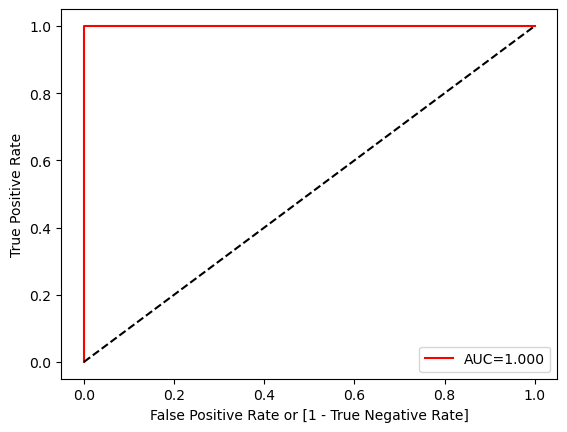

In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label = 'AUC=%0.3f'%auc) #--- method 2 
plt.plot([0, 1], [0, 1], 'k--') 
plt.legend(loc = 'lower right') 
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Bagged Decision Trees for Classification

In [101]:
from pandas import read_csv #not required
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7

kfold = KFold(n_splits=10) # random_state=seed,shuffle=True --- it was there in original file
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.9958333333333333


# Random Forest Classification

In [102]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10) #random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features,random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.9958333333333333


# AdaBoost Classification

In [103]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

1.0


# Naive Bayes Classification

In [104]:
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model = GaussianNB()
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())


0.976
